In [1]:
### basic imports 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import seaborn as sns; sns.set()

### sklearn model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

##roc/auc
from sklearn.metrics import roc_auc_score
## note online sklearn seemed to have plot_roc_curve, but I just found this one
##   I probably need to update my system!!
from sklearn.metrics import roc_curve

## fit simple logit
import statsmodels.api as sm

## lift curve
def mylift(y,p):
   """lift"""
   ii = np.argsort(p)[::-1] # We sort p from largest to smallest and get its index
   ps = np.cumsum(y[ii])/np.sum(y)
   return(ps)

In [2]:
### data
## train
trainDf = pd.read_csv("td1.csv")
ytr = trainDf.iloc[:,0].to_numpy(); xtr = trainDf.iloc[:,1:]
ntr = len(ytr)
## test
testDf = pd.read_csv("td2.csv")
yte = testDf.iloc[:,0].to_numpy(); xte = testDf.iloc[:,1:]
nte = len(yte)

In [3]:
trainDf.head()

,purchase,nTab,moCbook,iRecMer1,llDol
0,0,0,50.00000,0.019608,-2.302585
1,1,4,19.21813,0.049461,3.893452
2,0,1,50.00000,0.119167,-2.302585
3,0,1,50.00000,0.019608,-2.302585
4,0,0,50.00000,0.019608,-2.302585


In [4]:
trainDf.purchase.value_counts()

0    9742
1     258
Name: purchase, dtype: int64

In [5]:
#trainDf.nTab.value_counts()

Optimization terminated successfully.
         Current function value: 0.103175
         Iterations 8


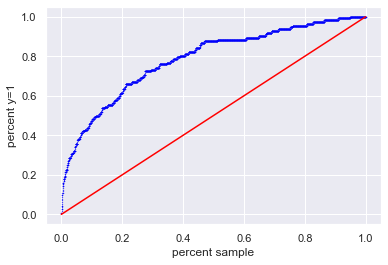

auc for logit:  0.7886295884966097


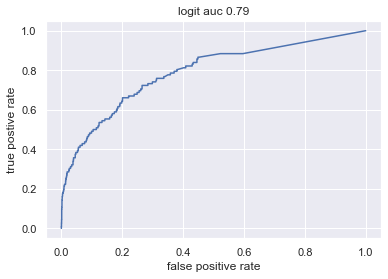

In [6]:
### logit
XX = sm.add_constant(xtr)
lfitM = sm.Logit(ytr, XX).fit()
XXp = sm.add_constant(xte)
phlgt = lfitM.predict(XXp)

## out of sample lift
pvec = np.linspace(1,nte,nte)/nte
plt.scatter(pvec,mylift(yte,phlgt),s=0.1,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

##auc
auclgt = roc_auc_score(yte,phlgt)
print('auc for logit: ',auclgt)

##roc
roclgt = roc_curve(yte,phlgt)
plt.plot(roclgt[0],roclgt[1])
plt.xlabel('false positive rate'); plt.ylabel('true postive rate')
plt.title('logit auc ' + str(np.round(auclgt,2)))
plt.show()

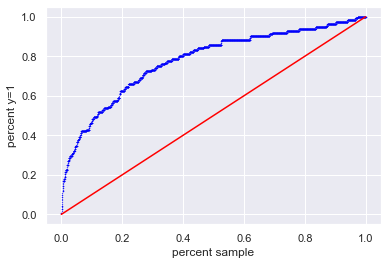

auc for logit:  0.7863645662847791


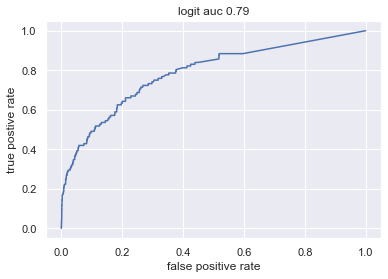

In [7]:
# Logisitc regression using SKlearn
from sklearn.linear_model import LogisticRegression
lfit = LogisticRegression()
lfit.fit(XX,ytr)

plogR = lfit.predict_proba(XXp)[:,1]

## out of sample lift
pvec = np.linspace(1,nte,nte)/nte
plt.scatter(pvec,mylift(yte,plogR),s=0.1,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

##auc
auclgt = roc_auc_score(yte,plogR)
print('auc for logit: ',auclgt)

##roc
roclgt = roc_curve(yte,plogR)
plt.plot(roclgt[0],roclgt[1])
plt.xlabel('false positive rate'); plt.ylabel('true postive rate')
plt.title('logit auc ' + str(np.round(auclgt,2)))
plt.show()

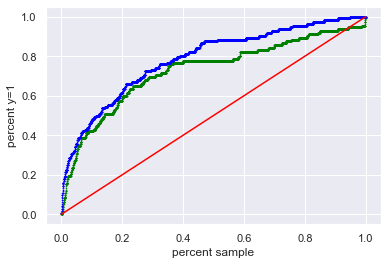

auc for tree:  0.7416696501636661


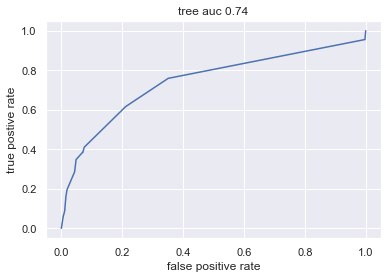

In [8]:
### decision tree
dtm = DecisionTreeClassifier(max_leaf_nodes=50)
dtm.fit(xtr,ytr)
phdt = dtm.predict_proba(xte)[:,1]

## out of sample lift
plt.scatter(pvec,mylift(yte,phdt),s=.5,c='green')
plt.scatter(pvec,mylift(yte,phlgt),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

##auc
aucdt = roc_auc_score(yte,phdt)
print('auc for tree: ',aucdt)

##roc
rocdt = roc_curve(yte,phdt)
plt.plot(rocdt[0],rocdt[1])
plt.xlabel('false positive rate'); plt.ylabel('true postive rate')
plt.title('tree auc ' + str(np.round(aucdt,2)))
plt.show()

oob score for Random Forests:  0.9741


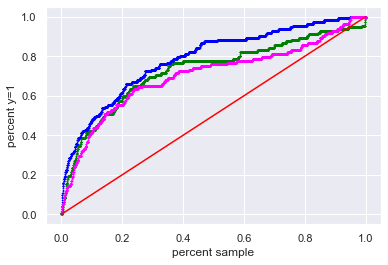

auc for random forests:  0.7073280775075989


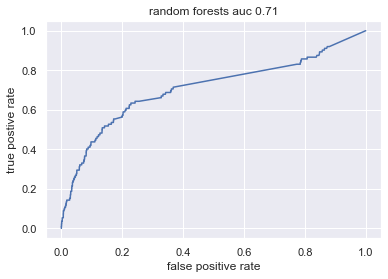

In [9]:
### random forests
rfm = RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators=500,max_features=2,min_samples_split=20,oob_score=True)
rfm.fit(xtr,ytr)
phrf = rfm.predict_proba(xte)[:,1]

# the OOB score is computed as the number of correctly predicted rows from the out of bag sample.
# not to useful in this application
print("oob score for Random Forests: ",rfm.oob_score_)

## out of sample lift
plt.scatter(pvec,mylift(yte,phdt),s=.5,c='green')
plt.scatter(pvec,mylift(yte,phlgt),s=.5,c='blue')
plt.scatter(pvec,mylift(yte,phrf),s=.5,c='magenta')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

##auc
aucrf = roc_auc_score(yte,phrf)
print('auc for random forests: ',aucrf)

##roc
rocrf = roc_curve(yte,phrf)
plt.plot(rocrf[0],rocrf[1])
plt.xlabel('false positive rate'); plt.ylabel('true postive rate')
plt.title('random forests auc ' + str(np.round(aucrf,2)))
plt.show()

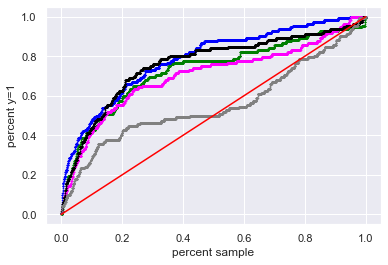

auc for tree:  0.76952668342296


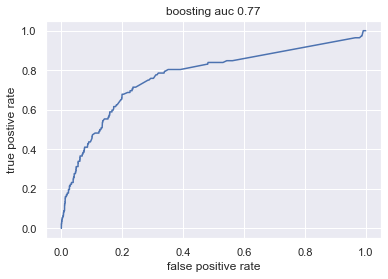

In [10]:
### gradient boosting

## let's try two different settings for boosting
# first setting
gbm = GradientBoostingClassifier(learning_rate=.01,n_estimators=1000,max_depth=4)
gbm.fit(xtr,ytr)
phgb = gbm.predict_proba(xte)[:,1]

# second setting
gbm1 = GradientBoostingClassifier(learning_rate=.1,n_estimators=1000,max_depth=4)
gbm1.fit(xtr,ytr)
phgb1 = gbm1.predict_proba(xte)[:,1]

## out of sample lift
plt.scatter(pvec,mylift(yte,phdt),s=.5,c='green')
plt.scatter(pvec,mylift(yte,phlgt),s=.5,c='blue')
plt.scatter(pvec,mylift(yte,phrf),s=.5,c='magenta')
plt.scatter(pvec,mylift(yte,phgb),s=.5,c='black')
plt.scatter(pvec,mylift(yte,phgb1),s=.5,c='grey')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

##auc
aucgb = roc_auc_score(yte,phgb)
print('auc for tree: ',aucgb)

##roc
rocgb = roc_curve(yte,phgb)
plt.plot(rocgb[0],rocgb[1])
plt.xlabel('false positive rate'); plt.ylabel('true postive rate')
plt.title('boosting auc ' + str(np.round(aucgb,2)))
plt.show()

In [11]:
### auc
aucv = np.array([auclgt,aucdt,aucrf,aucgb])
print('auc: (logit, tree, rf, gb)',np.round(aucv,2))


auc: (logit, tree, rf, gb) [0.79 0.74 0.71 0.77]
